# Explore and Plot the ATL08 data

In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (15, 8), 'font.size': 10})

from shapely.geometry import Polygon, Point
# for saving to kml
# import fiona
# fiona.supported_drivers['KML'] = 'rw'

import hvplot
import hvplot.pandas
import geoviews as gv

from pandas.testing import assert_frame_equal

In [3]:
# outline = gpd.read_file(f'{icesat2_path}/strip_outline.shp')
# gseries.to_file('D:/wspace/icesat2/ian/ak_test.shp')
# outline = gpd.read_file('D:/wspace/icesat2/ian/ak_test.shp')
# outline = gpd.read_file('D:/wspace/icesat2/alaska3/outline.shp')

# outline = gpd.read_file('D:/wspace/icesat2/urmia/outline.shp')
# outline = gpd.read_file('D:/wspace/icesat2/tanana/outline.shp')
# icesat2_path = 'D:/wspace/icesat2/alaska3a'
icesat2_path = f'/fs/project/howat.4/yadav.111/icesat2/greenland'

files = os.listdir(f'{icesat2_path}')
outline = gpd.read_file(f'{icesat2_path}/outline.shp')
outline

FID                                           geometry
0    0  POLYGON ((-73.23858 78.62993, -73.23763 78.631...

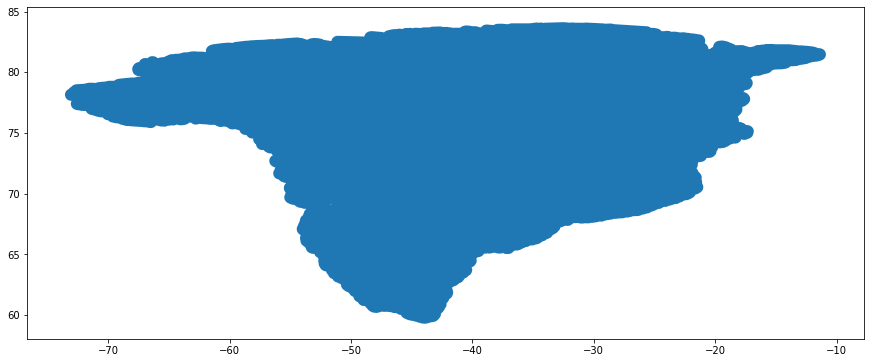

In [4]:
# outline = outline.to_crs({'init': 'epsg:4326'})
outline.plot()

In [5]:
# files

In [10]:
hdf_files = [f for f in files if f.endswith('.h5')]
shp_files = [f for f in files if f.endswith('.shp') and 'ATL06' in f]
csv_files = [f for f in files if f.endswith('.csv') and 'ATL06' in f]

In [14]:
shp_files

['processed_ATL06_20190801044531_05210403_002_01.shp']

In [15]:
fname = shp_files[0].split('.shp')[0]
fname

'processed_ATL06_20190801044531_05210403_002_01'

In [16]:
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{fname}.shp', parse_dates=True)

In [17]:
df.head()

lon        lat       h_li  q_flag                     t_dt strip
0 -50.069004  62.105110  29.104633       1  2019-08-01 04:46:49.378  gt1l
1 -50.069044  62.105289  29.195328       0  2019-08-01 04:46:49.381  gt1l
2 -50.069084  62.105467  29.187654       0  2019-08-01 04:46:49.384  gt1l
3 -50.069208  62.106003  29.502611       1  2019-08-01 04:46:49.392  gt1l
4 -50.069249  62.106182  28.908990       1  2019-08-01 04:46:49.395  gt1l

In [18]:
gdf.head()

t_dt       h_li  q_flag strip  \
0  2019-08-01 04:46:49.378000  29.104633       1  gt1l   
1  2019-08-01 04:46:49.381000  29.195328       0  gt1l   
2  2019-08-01 04:46:49.384000  29.187654       0  gt1l   
3  2019-08-01 04:46:49.392000  29.502611       1  gt1l   
4  2019-08-01 04:46:49.395000  28.908991       1  gt1l   

                     geometry  
0  POINT (-50.06900 62.10511)  
1  POINT (-50.06904 62.10529)  
2  POINT (-50.06908 62.10547)  
3  POINT (-50.06921 62.10600)  
4  POINT (-50.06925 62.10618)

In [24]:
df.h_te_median

0        9.201656
1        9.176081
2        9.186454
3        9.190130
4        9.175193
          ...    
3579    57.687225
3580    61.959890
3581    61.979824
3582    62.809513
3583    63.087902
Name: h_te_median, Length: 3584, dtype: float64

In [25]:
base = gv.tile_sources.ESRI
strips = gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])
terrain_scatter = df.hvplot(y='lat', x='h_te_median', kind='scatter', height=700, alpha=.7).relabel('terrain') 
canopy_scatter = df.hvplot(y='lat', x='h_canopy', kind='scatter', height=700, alpha=.7).relabel('canopy')
# fig1 = (base*strips + terrain_scatter*canopy_scatter).cols(2)
fig1 = base*strips + terrain_scatter*canopy_scatter
# hvplot.save(fig1, f'{icesat2_path}/{fname}.png')

fig1

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [Longitude,Latitude]   (strip)
   .Overlay.II :Overlay
      .Scatter.Terrain :Scatter   [h_te_median]   (lat)
      .Scatter.Canopy  :Scatter   [h_canopy]   (lat)

In [26]:
# base * strips

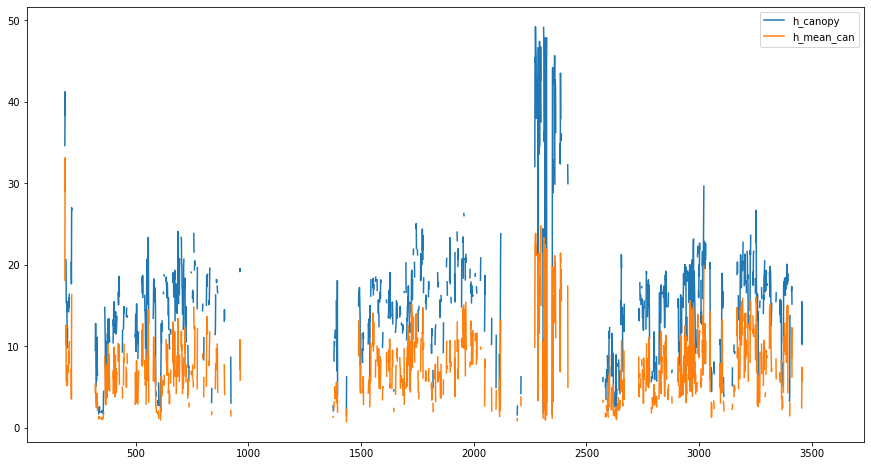

In [27]:
# gdf.h_te_media.plot()
gdf[['h_canopy', 'h_mean_can']].plot();

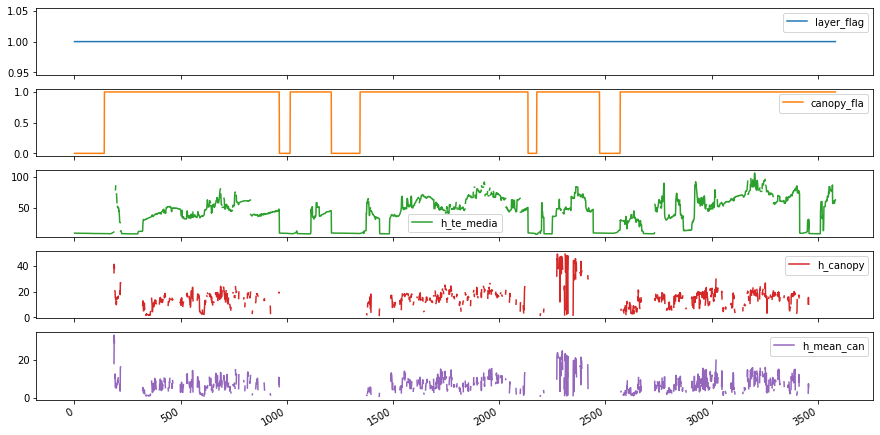

In [28]:
gdf[['layer_flag','canopy_fla', 'h_te_media', 'h_canopy', 'h_mean_can']].plot(subplots=True);

In [29]:
gdf.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_', 'h_te_inter',
       'h_te_max', 'h_te_mean', 'h_te_media', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncer', 'n_te_photo', 'terrain_sl',
       'canopy_fla', 'canopy_ope', 'canopy_rh_', 'centroid_h', 'h_canopy',
       'h_canopy_a', 'h_canopy_q', 'h_canopy_u', 'h_dif_cano', 'h_max_cano',
       'h_max_ca_1', 'h_mean_can', 'h_mean_c_1', 'h_median_c', 'h_median_1',
       'h_min_cano', 'h_min_ca_1', 'landsat_fl', 'landsat_pe', 'n_ca_photo',
       'n_toc_phot', 'toc_roughn', 'strip', 'geometry'],
      dtype='object')

1    3584
Name: layer_flag, dtype: int64


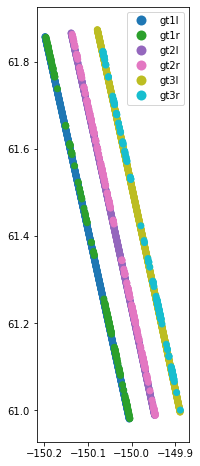

In [30]:
print(gdf.layer_flag.value_counts())
# print(gdf.t_dt.min())
# gdf.head(2)
gdf.plot(column='strip', legend=True)

In [31]:
# gv.tile_sources.ESRI * gdf.hvplot(geo=True, color='strip', width=500, height=800, alpha=.5)

In [32]:
# gv.tile_sources.ESRI * gdf.hvplot(geo=True, color='h_te_media', width=500, height=800, alpha=.5, cmap='rainbow')

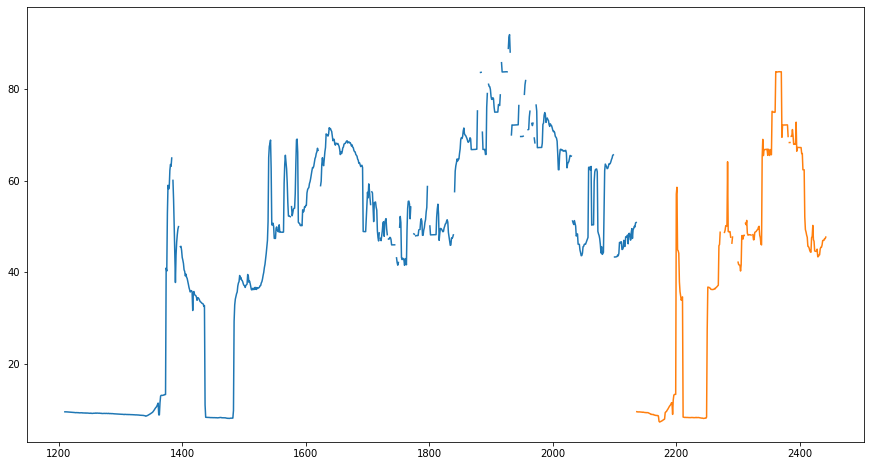

In [33]:
gdf[gdf.strip=='gt2l'].h_te_media.plot()
gdf[gdf.strip=='gt2r'].h_te_media.plot()

In [34]:
# gdf.h_te_media.plot();

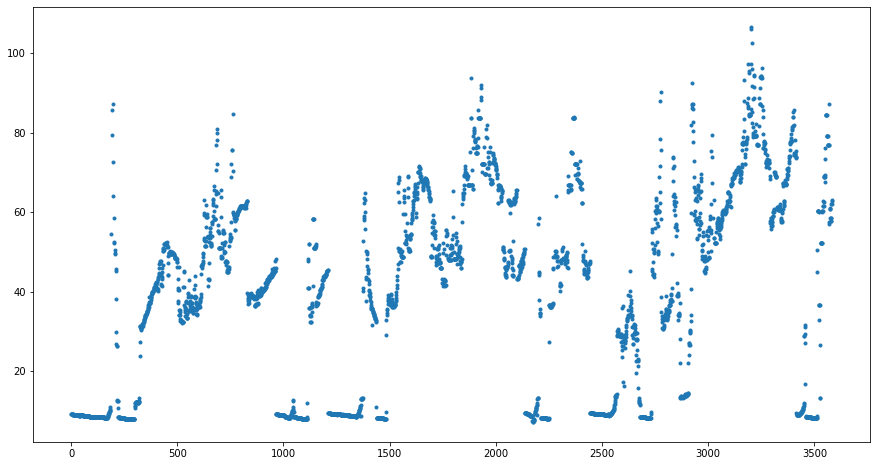

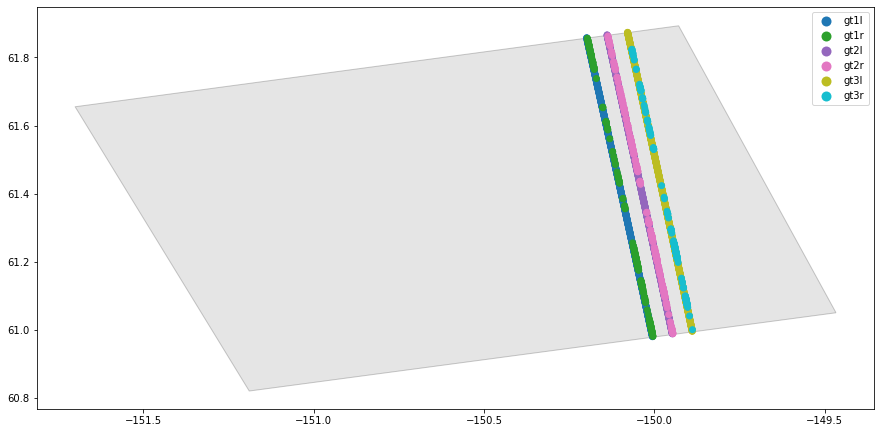

In [35]:
gdf[gdf.layer_flag==1].h_te_media.plot(style='.')
# gdf[gdf.layer_flag==0].h_te_media.plot(style='o', alpha=.6)

ax = outline.plot(edgecolor='k', facecolor='gray', alpha=.2)
gdf.plot(column='strip', legend=True, ax=ax);

In [36]:
# gdf['lat'] = gdf.geometry.apply(lambda x:x.y)

In [37]:
gdf.crs

{'init': 'epsg:4326'}

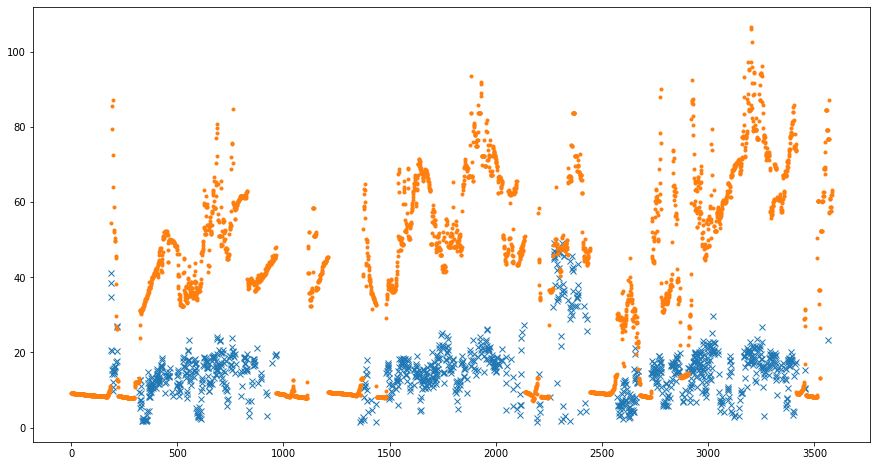

In [38]:
gdf.h_canopy.plot(style='x')
gdf.h_te_media.plot(style='.');

In [39]:
dfx = gdf.drop(['geometry'], axis=1)
dfx = pd.DataFrame(dfx)
dfx['t_dt'] = pd.to_datetime(dfx.t_dt)
type(dfx)

pandas.core.frame.DataFrame

In [40]:
df['t_dt'] = pd.to_datetime(df.t_dt)


In [41]:
df.head()

lon        lat                    t_dt  layer_flag  h_te_best_fit  \
0 -150.00533  60.980240 2019-07-31 11:29:20.320           1       9.171734   
1 -150.00551  60.981133 2019-07-31 11:29:20.334           1       9.165697   
2 -150.00570  60.982025 2019-07-31 11:29:20.348           1       9.164847   
3 -150.00589  60.982918 2019-07-31 11:29:20.362           1       9.172182   
4 -150.00609  60.983814 2019-07-31 11:29:20.377           1       9.156332   

   h_te_interp  h_te_max  h_te_mean  h_te_median  h_te_min  ...  \
0     9.195848  9.435080   9.186528     9.201656  8.745970  ...   
1     9.175939  9.388001   9.161122     9.176081  8.702844  ...   
2     9.173530  9.420040   9.173231     9.186454  8.661035  ...   
3     9.173621  9.434613   9.168937     9.190130  8.689914  ...   
4     9.171216  9.444901   9.155044     9.175193  8.695684  ...   

   h_median_canopy  h_median_canopy_abs  h_min_canopy  h_min_canopy_abs  \
0              NaN                  NaN           NaN               NaN   
1              NaN                  NaN           NaN               NaN   
2              NaN                  NaN           NaN               NaN   
3              NaN                  NaN           NaN               NaN   
4              NaN                  NaN           NaN               NaN   

   landsat_flag  landsat_perc  n_ca_photons  n_toc_photons  toc_roughness  \
0             0           0.0             0              0            NaN   
1             0           0.0             0              0            NaN   
2             0           0.0             0              0            NaN   
3             0           0.0             0              0            NaN   
4             0           0.0             0              0            NaN   

   strip  
0   gt1l  
1   gt1l  
2   gt1l  
3   gt1l  
4   gt1l  

[5 rows x 39 columns]

In [42]:
df.hvplot(y='h_canopy', x='t_dt', by='strip', kind='scatter')

:NdOverlay   [strip]
   :Scatter   [t_dt]   (h_canopy)

In [47]:
df.hvplot(y='h_te_min', x='t_dt', kind='scatter') * \
df.hvplot(y='h_te_median', x='t_dt', kind='scatter', alpha=.5) * \
df.hvplot(y='h_te_max', x='t_dt', kind='scatter', alpha=.7)

:Overlay
   .Scatter.I   :Scatter   [t_dt]   (h_te_min)
   .Scatter.II  :Scatter   [t_dt]   (h_te_median)
   .Scatter.III :Scatter   [t_dt]   (h_te_max)

In [48]:
# gv.tile_sources.StamenTerrainRetina 
(gv.tile_sources.ESRI  * df.hvplot.points('lon', 'lat', geo=True, color='strip', alpha=0.6, width=500, height=800, hover=['strip', 'h_li']) + 
 df.hvplot(y='lat', x='h_canopy', by='layer_flag', kind='scatter', height=800, alpha=.7)).cols(2)

:Layout
   .Overlay.I   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (strip)
   .NdOverlay.I :NdOverlay   [layer_flag]
      :Scatter   [h_canopy]   (lat)

In [49]:
(gv.tile_sources.ESRI  * df.hvplot.points('lon', 'lat', geo=True, color='strip', alpha=0.6, width=500, height=800, hover=['strip', 'h_li']) + 
 df.hvplot(y='lat', x='h_te_median', kind='scatter', height=800, alpha=.7)*df.hvplot(y='lat', x='h_canopy', kind='scatter', height=800, alpha=.7)).cols(2)

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (strip)
   .Overlay.II :Overlay
      .Scatter.I  :Scatter   [h_te_median]   (lat)
      .Scatter.II :Scatter   [h_canopy]   (lat)

In [50]:
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
df['t_dt'] = pd.to_datetime(dfx.t_dt)


In [51]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')

In [52]:
df[['h_te_best_fit', 'h_te_interp', 'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode']].hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [53]:
df[['h_canopy', 'h_canopy_quad', 'h_dif_canopy']].hvplot(width=800)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [54]:
df[['h_max_canopy', 'h_mean_canopy', 'h_median_canopy', 'h_min_canopy']].hvplot(width=800)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [55]:
df[['h_max_canopy', 'h_mean_canopy']].hvplot(width=800)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [56]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')

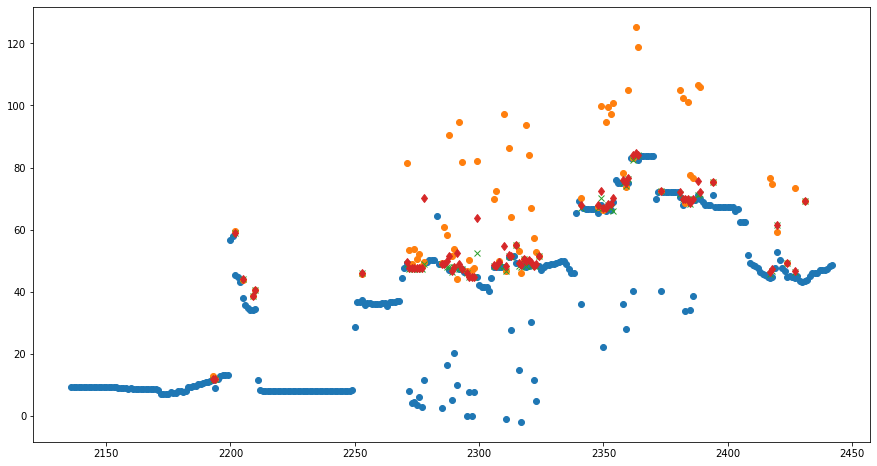

In [58]:
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
df['t_dt'] = pd.to_datetime(dfx.t_dt)
df = df[df.strip=='gt2r']

df.h_te_interp.plot(style='o')
(df.h_canopy+df.h_te_interp).plot(style='o')
df.h_canopy_abs.plot(style='x')
df.h_max_canopy_abs.plot(style='d')

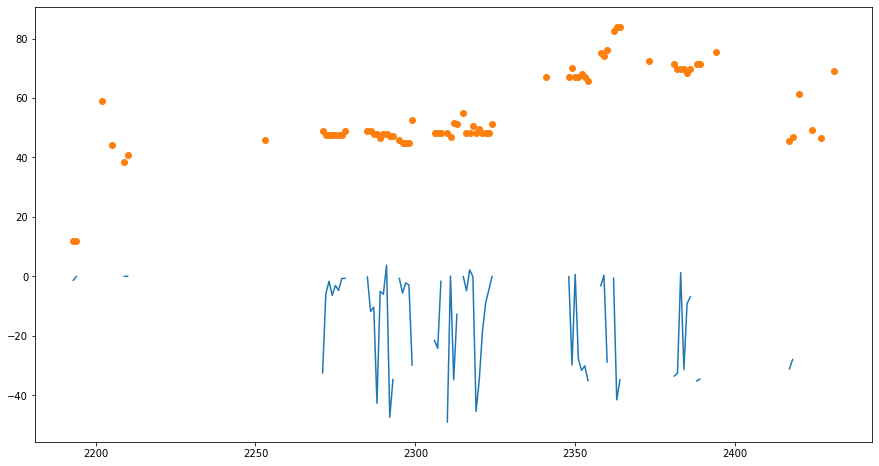

In [60]:
(df.h_canopy_abs - (df.h_canopy+df.h_te_interp)).plot()
df.h_canopy_abs.plot(style='o')

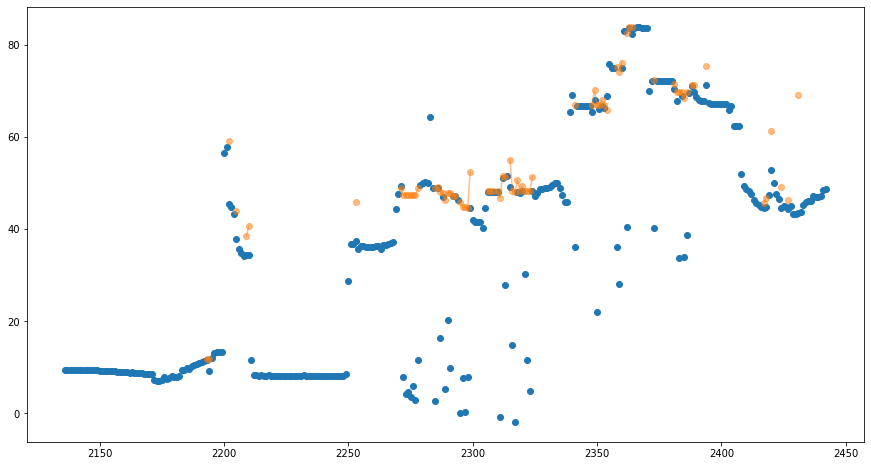

In [80]:
df.h_te_interp.plot(style='o')
df.h_canopy_abs.plot(style='-o', alpha=.5)


In [61]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')